In [1]:
import psycopg2
from psycopg2 import DatabaseError
import logging
import requests
import datetime as dt
from dateutil.relativedelta import relativedelta
from parser_opennem import parse_request_json
from db_populate import insert_batch
from dateutil.relativedelta import relativedelta
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
db_name = "energy"
db_user = "dawki"
db_pword_file = "C:\\Users\\dawki\\OneDrive\\Archive\\2019\\Documents\\private.txt"
with open(db_pword_file) as f:
    db_pword = f.read()

In [3]:
## Connect to DB
dbc = psycopg2.connect(user=db_user,
                        password=db_pword,
                        host="127.0.0.1",
                        port="5432",
                        database=db_name)
cursor = dbc.cursor()

In [5]:
# Rquest all NSW power data
cursor.execute(
    f"select interval_start, dim_region.code as region, dim_fueltech.long_name as fueltech, power \
    from fact_power, dim_batch, dim_fueltech, dim_region \
    where dim_batch.id=batch_id AND fueltech_id=dim_fueltech.id AND dim_region.id = region_id AND dim_region.code = 'NSW1'"
)
nsw_power = cursor.fetchall()

In [7]:
nsw_aggregate_power_df["power"].rolling(window=n).mean()

interval_start
2019-01-01 00:00:00            NaN
2019-01-01 00:05:00            NaN
2019-01-01 00:10:00            NaN
2019-01-01 00:15:00            NaN
2019-01-01 00:20:00            NaN
                          ...     
2021-08-31 23:35:00    8109.477513
2021-08-31 23:40:00    8097.178846
2021-08-31 23:45:00    8084.443304
2021-08-31 23:50:00    8072.323804
2021-08-31 23:55:00    8059.742012
Name: power, Length: 271872, dtype: float64

In [14]:
nsw_power_df = pd.DataFrame(nsw_power, columns=["interval_start","region","fueltech","power"])
nsw_aggregate_power_df = nsw_power_df.groupby(["interval_start"]).sum()

# rolling average
nsw_aggregate_power_df["rolling_avg_power_month"] = nsw_aggregate_power_df["power"].rolling(window=48*31).mean()
nsw_aggregate_power_df["rolling_avg_power_week"] = nsw_aggregate_power_df["power"].rolling(window=48*7).mean()
nsw_aggregate_power_df["rolling_avg_power_day"] = nsw_aggregate_power_df["power"].rolling(window=48).mean()

In [16]:
nsw_aggregate_power_df

,power,rolling_avg_power_month,rolling_avg_power_week,rolling_avg_power_day
interval_start,,,,
2019-01-01 00:00:00,7596.12641,NaN,NaN,NaN
2019-01-01 00:05:00,7550.64651,NaN,NaN,NaN
2019-01-01 00:10:00,7602.62631,NaN,NaN,NaN
2019-01-01 00:15:00,7689.07641,NaN,NaN,NaN
2019-01-01 00:20:00,7723.90661,NaN,NaN,NaN
...,...,...,...,...
2021-08-31 23:35:00,7965.33700,7633.196059,7440.445307,8109.477513
2021-08-31 23:40:00,8029.22700,7632.064254,7436.719485,8097.178846
2021-08-31 23:45:00,7927.65700,7630.858746,7432.957145,8084.443304


# Long run aggregate 

<AxesSubplot:title={'center':'NSW long run aggregate power'}, xlabel='interval_start', ylabel='Aggergate production (MW)'>

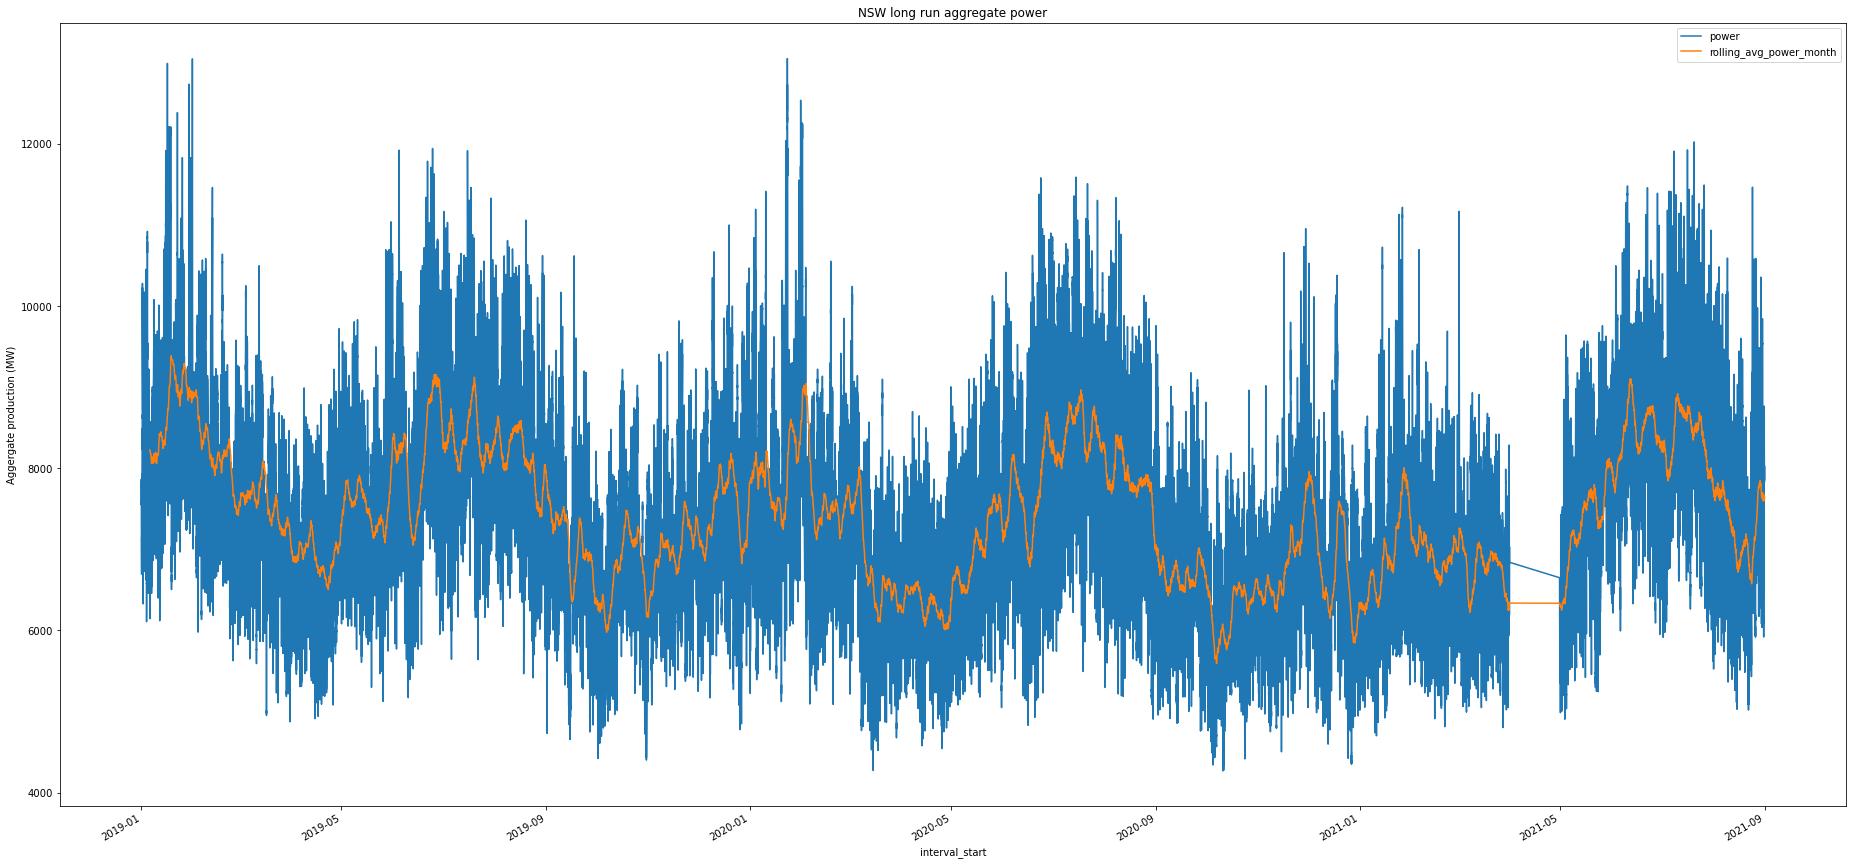

In [17]:
fig, ax = plt.subplots(figsize=(32,16))
ax.set_title('NSW long run aggregate power')
ax.set_ylabel('Aggergate production (MW)')
nsw_aggregate_power_df[["power","rolling_avg_power_month"]].plot(ax=ax)


# Year

<AxesSubplot:title={'center':'NSW long run aggregate power'}, xlabel='interval_start', ylabel='Aggergate production (MW)'>

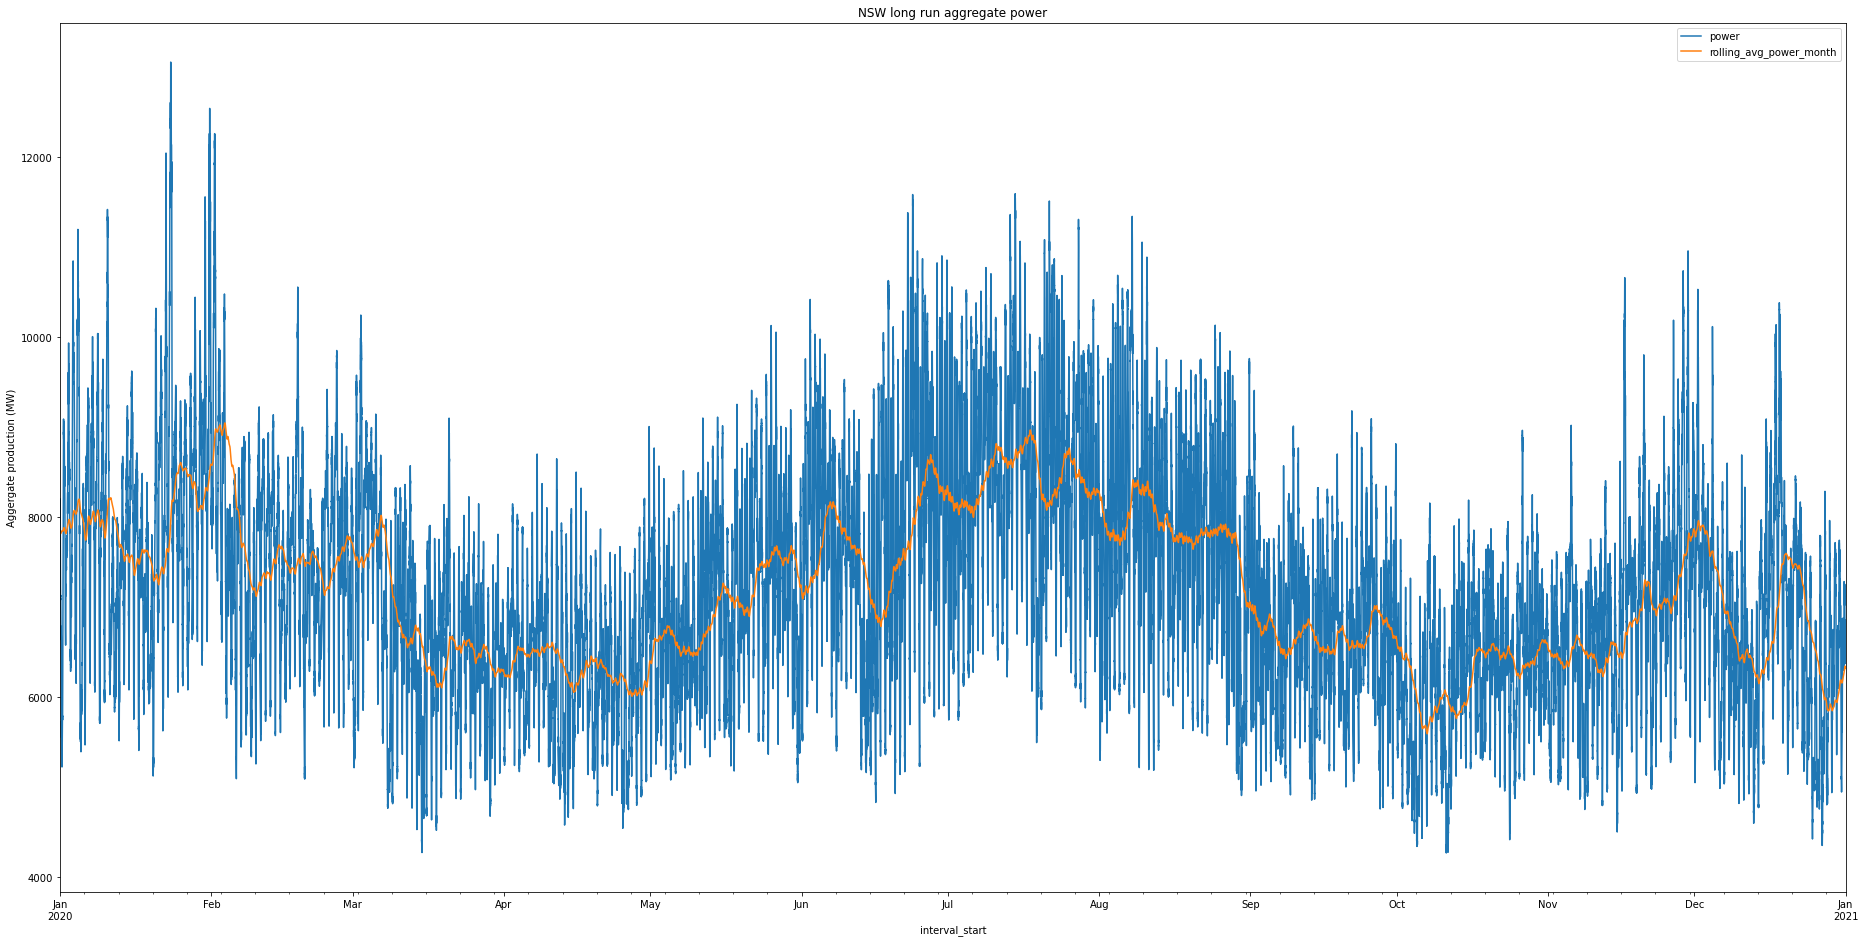

In [18]:
fig, ax = plt.subplots(figsize=(32,16))
ax.set_title('NSW long run aggregate power')
ax.set_ylabel('Aggergate production (MW)')
nsw_aggregate_power_df[["power","rolling_avg_power_month"]][(nsw_aggregate_power_df.index >= '2020-01-01') & (nsw_aggregate_power_df.index <= '2021-01-01')].plot(ax=ax)

# Month

<AxesSubplot:title={'center':'NSW long run aggregate power'}, xlabel='interval_start', ylabel='Aggergate production (MW)'>

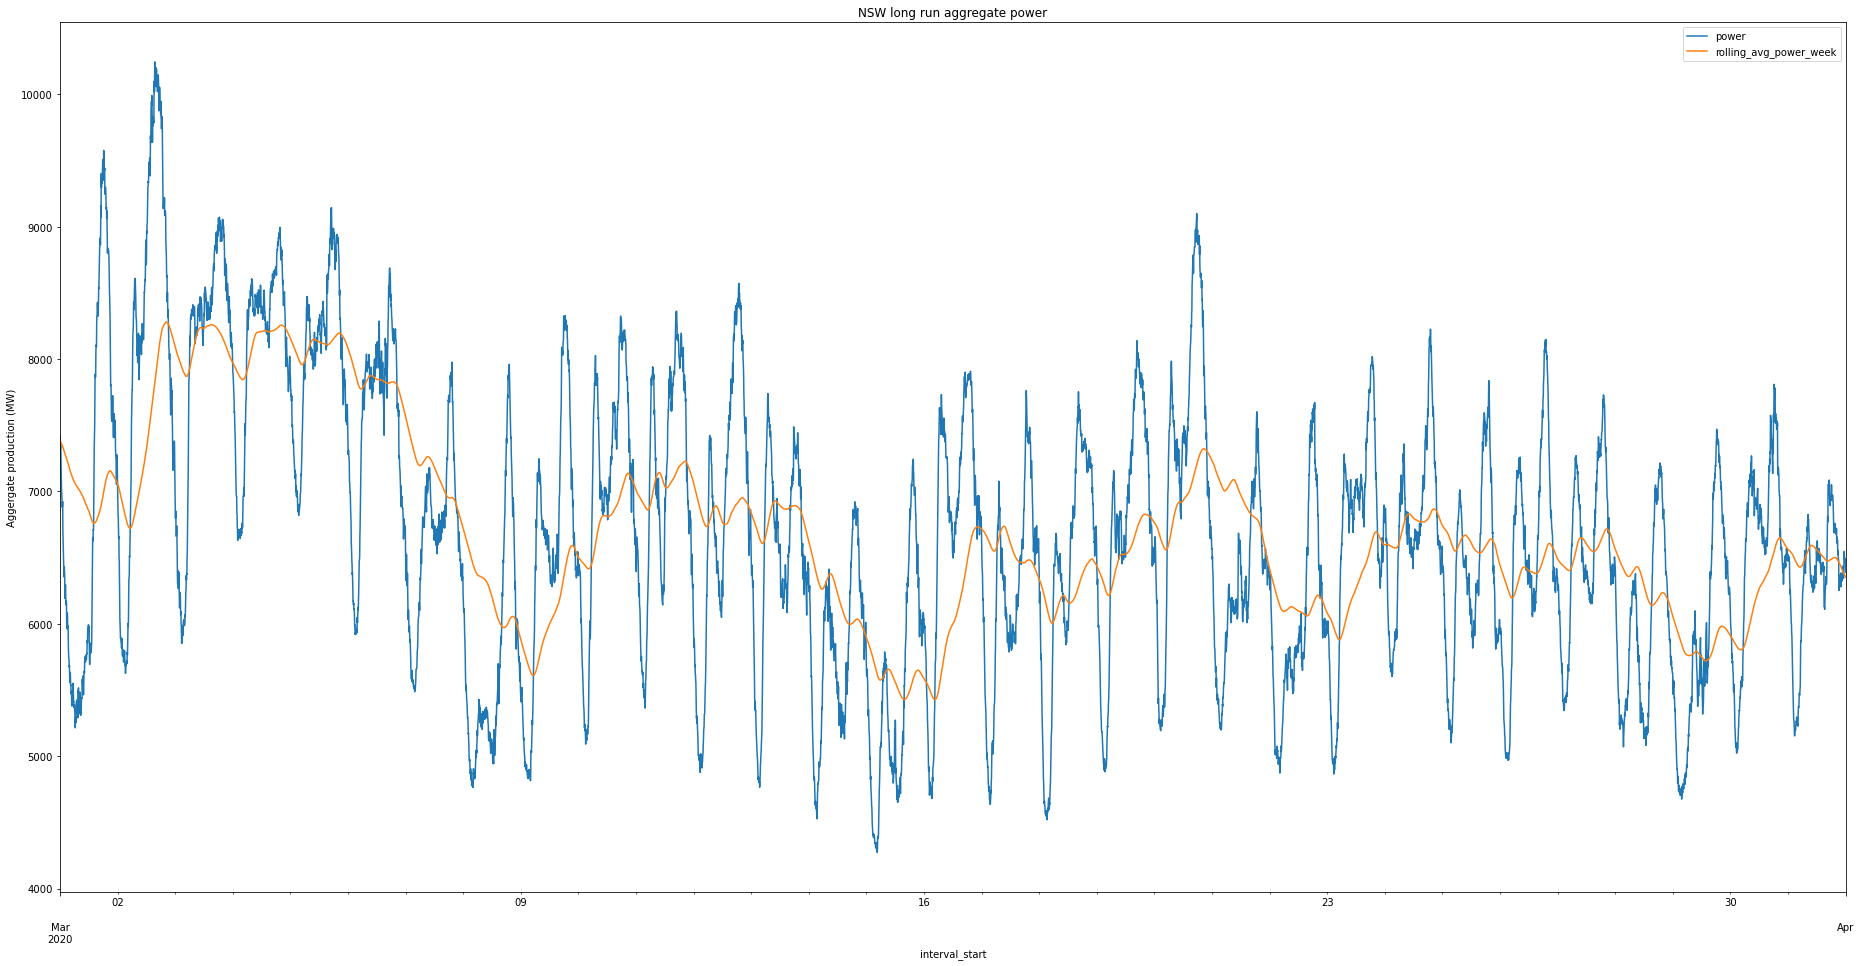

In [22]:
fig, ax = plt.subplots(figsize=(32,16))
ax.set_title('NSW long run aggregate power')
ax.set_ylabel('Aggergate production (MW)')
nsw_aggregate_power_df[["power","rolling_avg_power_week"]][(nsw_aggregate_power_df.index >= '2020-03-01') & (nsw_aggregate_power_df.index <= '2020-04-01')].plot(ax=ax)

# Week

<AxesSubplot:title={'center':'NSW long run aggregate power'}, xlabel='interval_start', ylabel='Aggergate production (MW)'>

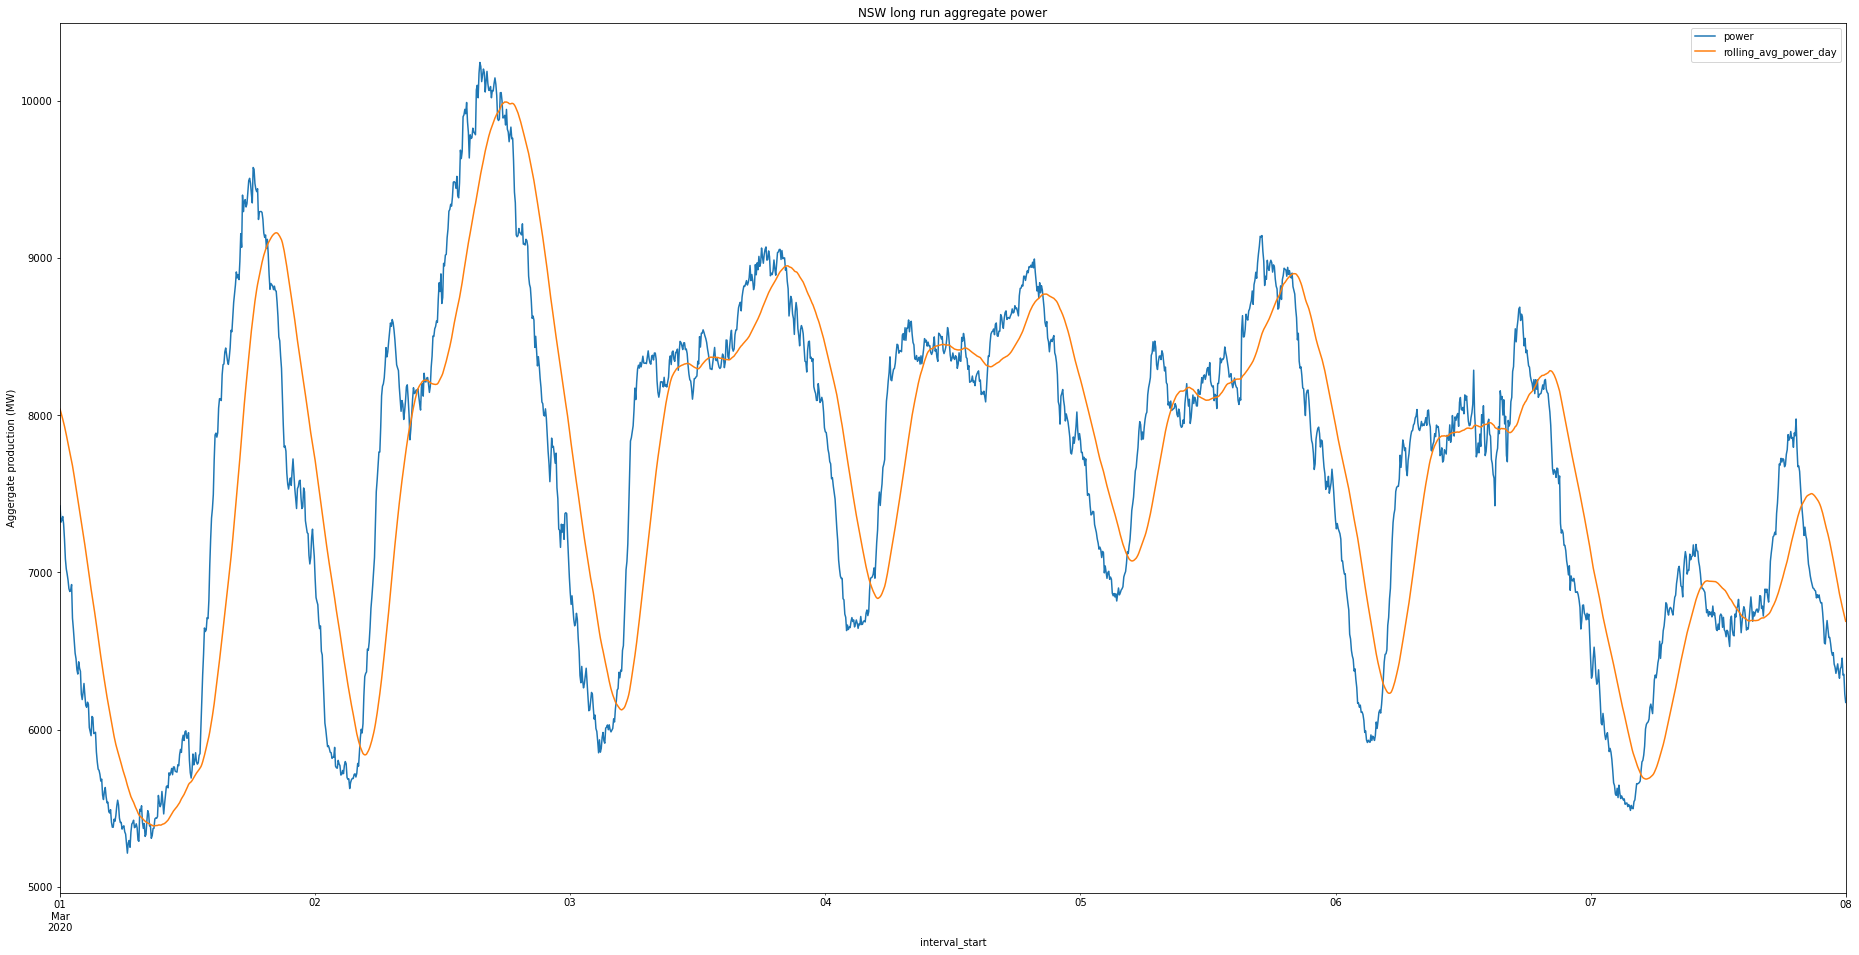

In [20]:
fig, ax = plt.subplots(figsize=(32,16))
ax.set_title('NSW long run aggregate power')
ax.set_ylabel('Aggergate production (MW)')
nsw_aggregate_power_df[["power","rolling_avg_power_day"]][(nsw_aggregate_power_df.index >= '2020-03-01') & (nsw_aggregate_power_df.index <= '2020-03-08')].plot(ax=ax)

# Day

<AxesSubplot:title={'center':'NSW long run aggregate power'}, xlabel='interval_start', ylabel='Aggergate production (MW)'>

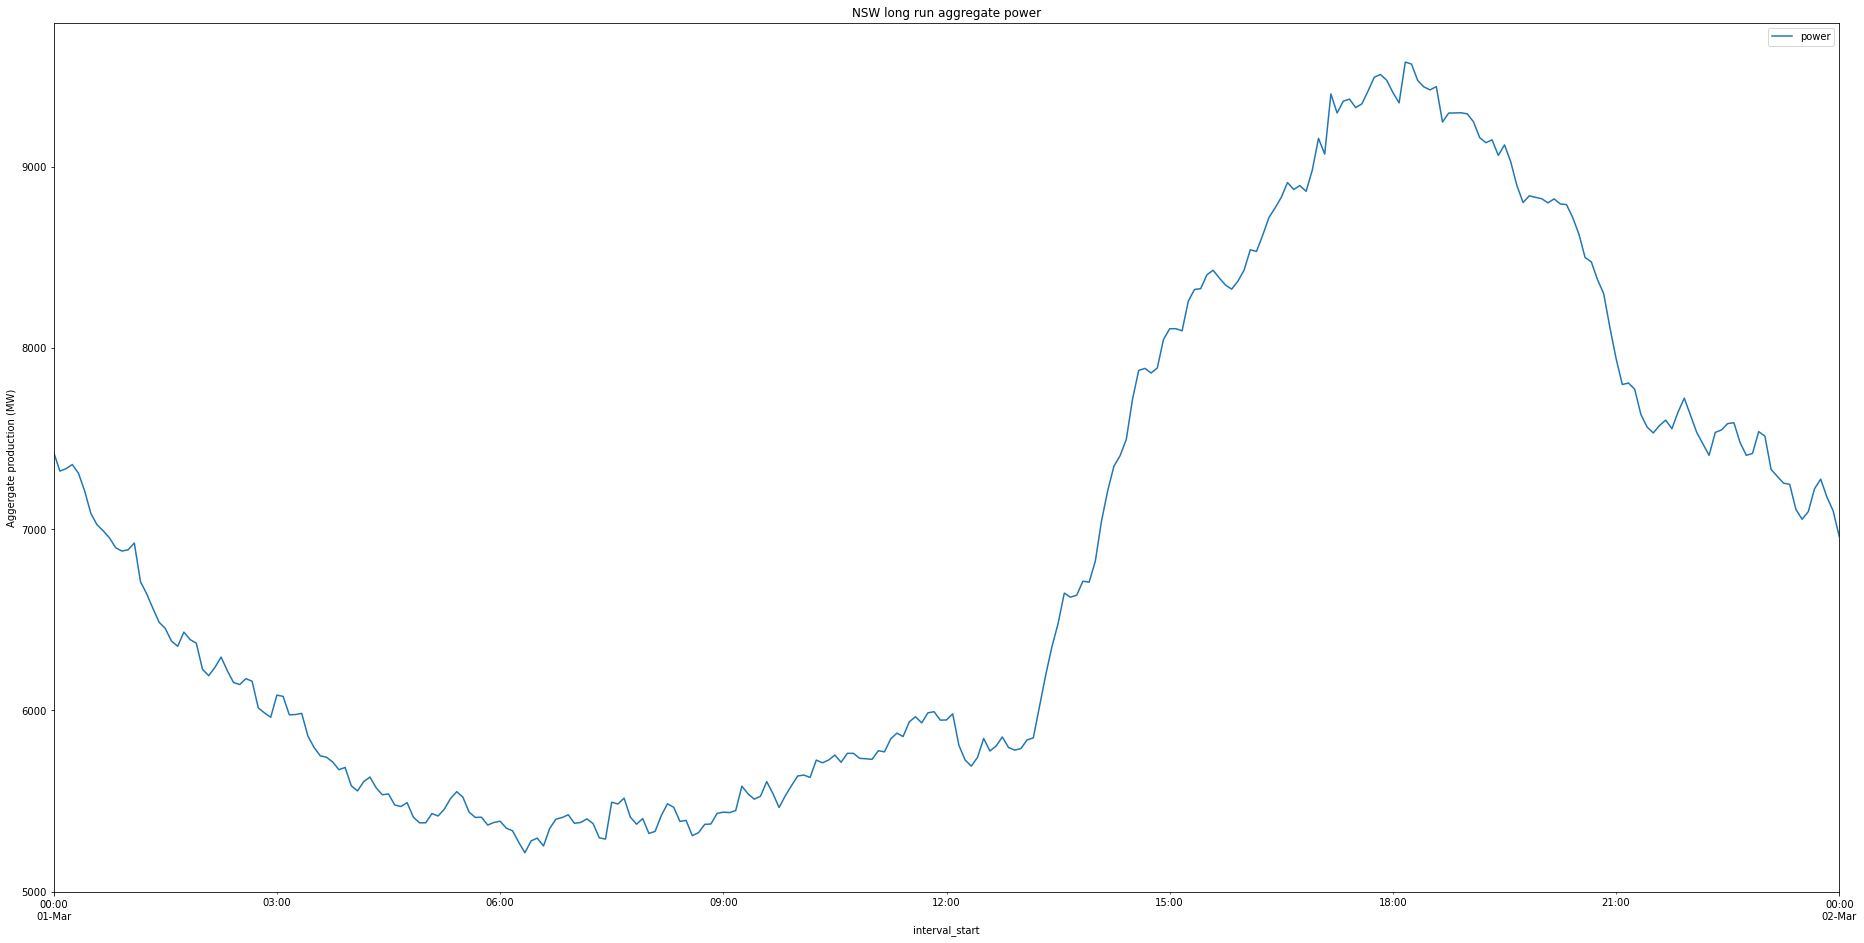

In [75]:
fig, ax = plt.subplots(figsize=(32,16))
ax.set_title('NSW long run aggregate power')
ax.set_ylabel('Aggergate production (MW)')
nsw_aggregate_power_df[(nsw_aggregate_power_df.index >= '2020-03-01') & (nsw_aggregate_power_df.index <= '2020-03-02')].plot(ax=ax)